<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw4_bsm_geometric_asian_option.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''======
run once, then comment it off, and run again
========'''
!git clone https://github.com/hechen2020/19ma573HuixinChen.git

Cloning into '19ma573HuixinChen'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 205 (delta 10), reused 0 (delta 0), pack-reused 176
Receiving objects: 100% (205/205), 281.45 KiB | 9.71 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [2]:
cd ./19ma573HuixinChen/src/

/content/19ma573HuixinChen/src


In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from contract_v01 import VanillaOption
from sde_1d_v01 import Sde_1d
from sde_1d_v01 import Gbm_1d

In [0]:
'''==============
output: BSM geometric asian option price
==============='''
def bsm_geometric_asian_price(self,
                              otype = 1,
                              strike = 110.,
                              maturity = 1,
                              num_step = 4 #patition number:m
                             ):
  s0 = self.init_state
  sigma = self.vol_ratio
  r = self.drift_ratio
  k = strike
  T = maturity
  m = num_step
  
  mu = r - (sigma**2/2)
  hmu = mu/2
  hsigma = np.sqrt((sigma**2)*(2*m+1)/(6*(m+1)))
  hr = hmu +hsigma**2/2
  
  d1 = (np.log(s0/k) + (hr+0.5*hsigma**2) * T) / (hsigma*np.sqrt(T))
  d2 = d1 - hsigma*np.sqrt(T)
  
  return (np.exp(T*(hr-r)) * (otype*s0*ss.norm.cdf(otype*d1)
                          - otype*k*np.exp(-hr*T)*ss.norm.cdf(otype*d2)))
  
Gbm_1d.bsm_geometric_asian_price = bsm_geometric_asian_price

In [5]:
'''==============
Test BSM geometric asian option price
==============='''
gbm1 = Gbm_1d(init_state=100., drift_ratio=0.0475, vol_ratio=.2)
gao1 = gbm1.bsm_geometric_asian_price(otype = 1,
                                      strike = 110.,
                                      maturity = 1,
                                      num_step = 4)
print('>>>>>> geometric call option value is ' + str(gao1))

>>>>>> geometric call option value is 1.607164727431734


In [0]:
'''===============
market available data
=================='''
#paras for stock price
spot = 100
rate = .05
#paras for geometric asian options
otype = 1
maturity = 2/12
num_step = 8
strike_list = [97, 99, 101, 103]
market_price_list = [3.7925736094875964,
                     2.5429985313737244,
                     1.6026613800895042,
                     0.9366198675047346]

In [0]:
'''================
calibrated volatility based on vanilla options
=================='''
calibarated_vol = 0.18109375000000028

In [0]:
'''========
your code is in this below
============'''
#calculate geometric asian call option prices with BSM model with the given strike
gbm2 = Gbm_1d(init_state=100., drift_ratio=0.05, vol_ratio=0.18109375000000028)

option_list1 = []

for i in range(len(strike_list)):
  option1 = VanillaOption(
      otype = 1,
      strike = strike_list[i],
      maturity = 2/12,
      market_price = gbm2.bsm_geometric_asian_price(otype=1,strike=strike_list[i],maturity=2/12,num_step = 8)
  )
      
  option_list1.append(option1) 


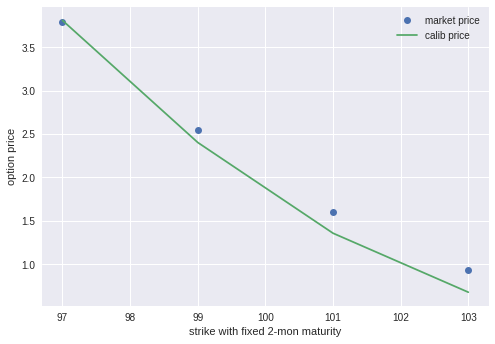

In [9]:
'''========
your code is in this below
============'''
#graphing

x_co = [option_list1[i].strike for i in range(len(option_list1))]
y_co = [market_price_list[i] for i in range(len(option_list1))]
plt.plot(x_co, y_co, 'o', label='market price')

y_co = [option_list1[i].market_price for i in range(len(option_list1))]
plt.plot(x_co, y_co, label = 'calib price')

plt.ylabel('option price')
plt.xlabel('strike with fixed 2-mon maturity')
plt.legend();

pass

The calibrated prices using the implied volatility closely resemble the market price for geometric asian call options under BSM model